In [76]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [77]:
IMAGE_NAME = "monarch_butterfly.jpeg"

In [78]:
def display_image(image):
  # Opencv2 normally shows in BGR, we want RGB so convert before displaying
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  # Remove the graph ticks
  plt.xticks([]), plt.yticks([]) 
  # Show the image
  plt.show()

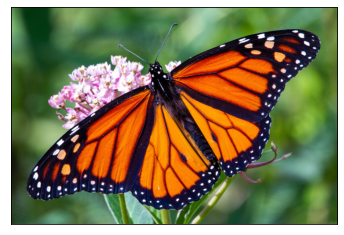

In [79]:
# Load the image
image = cv2.imread(IMAGE_NAME)
display_image(image)

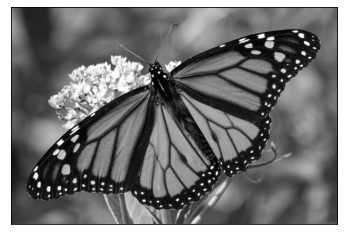

In [80]:
# Turn the image into greyscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display_image(gray_image)

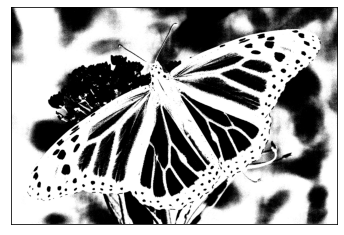

In [81]:
ret, threshold_image = cv2.threshold(gray_image, 110, 255, cv2.THRESH_BINARY_INV)
display_image(threshold_image)

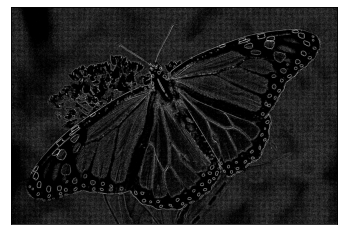

In [82]:
new_tresh = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 9, 12)
display_image(new_tresh)

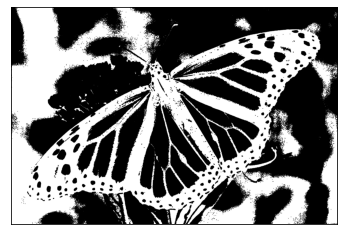

In [83]:
# Kernel used for erosion
kernal_value = 5
kernel = np.ones((kernal_value, kernal_value), np.uint8) 

# Refine edges
erosion_image = cv2.erode(threshold_image, kernel, iterations = 1)

display_image(erosion_image)

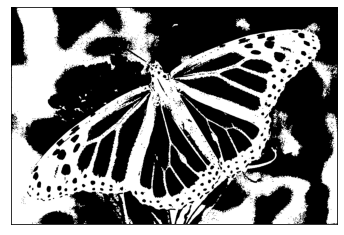

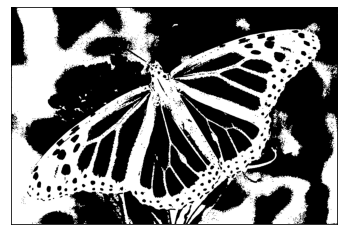

In [84]:
# Open the image (erosion followed by dilation) to remove noise
opening_image = cv2.morphologyEx(erosion_image, cv2.MORPH_OPEN, kernel)
display_image(opening_image)

# Close the image (dilation followed by erosion) to close holes
closing_image = cv2.morphologyEx(opening_image, cv2.MORPH_CLOSE, kernel)
display_image(closing_image)

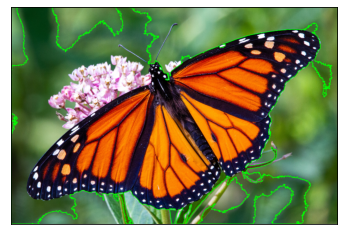

In [87]:
# Find the contours
contours, hierarchy = cv2.findContours(closing_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# List to hold all areas
areas = [] 

for contour in contours:
  area = cv2.contourArea(contour)
  areas.append(area)

max_area = max(areas)
max_area_index = areas.index(max_area)

# Largest contour
max_contour = contours[max_area_index]
contour_image = cv2.drawContours(image, [max_contour], 0, (0, 255, 0), 5, maxLevel = 0)
display_image(image)